<a href="https://colab.research.google.com/github/pauloalexx/Python_study/blob/main/Mini_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto 1 utilizando CRISP-DM

## Insights

insight -> que ano economia EUA estava aquecida

insight -> Imóveis mais caros vendem?

insight -> Quais imóveis mais foram vendidos?

insight -> Tem relação entre as features de classificação do imóvel em relação às vendas/revendas e preço?

insight -> Qual relação de preço dos imóveis

insight -> Qual feature diferencia mais em relação ao preço dos imóveis

insight -> Banheiro em número quebrado significa lavabo, ou sem banheira (Data understanding)

insight -> Pesquisar preço médio dos imóveis por estado e cidade

insight -> Americanos gostam de local seguro, baixa criminalidade

## Dados Complementares

### NIBRS - Criminalidade

In [ ]:
df_incident = pd.read_csv('/content/NIBRS_incident.csv')
df_agencies = pd.read_csv('/content/agencies.csv')
df_state = pd.read_csv('/content/REF_STATE.csv')
df_offense = pd.read_csv('/content/NIBRS_OFFENSE.csv')

In [ ]:
df_incident.head() #incident_id + agency_id

,data_year,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,orig_format,did
0,2021,20593,134450953,37392705,f,2021-02-17 11:49:45.783648,2021-01-01,f,2.0,6,NaN,ACCEPTED,NaN,F,94807262
1,2021,20593,134458780,37392705,f,2021-02-17 11:49:45.826283,2021-01-02,f,2.0,6,NaN,ACCEPTED,NaN,F,94807258
2,2021,20593,134450933,37392705,f,2021-02-17 11:49:45.794765,2021-01-02,f,2.0,6,NaN,ACCEPTED,NaN,F,94811812
3,2021,20593,137000883,37392705,f,2021-04-19 16:17:47.187,2021-01-02,f,15.0,6,NaN,ACCEPTED,NaN,F,100270106
4,2021,20593,134458798,37392705,f,2021-02-17 11:49:45.889115,2021-01-03,f,22.0,6,NaN,ACCEPTED,NaN,F,94811834


In [ ]:
df_agencies.stb.freq(['ncic_agency_name'])

In [ ]:
df_agencies.head() #agency_id + county_name + ucr_agency_name

,yearly_agency_id,agency_id,data_year,ori,legacy_ori,covered_by_legacy_ori,direct_contributor_flag,dormant_flag,dormant_year,reporting_type,...,nibrs_leoka_start_date,nibrs_ct_start_date,nibrs_multi_bias_start_date,nibrs_off_eth_start_date,covered_flag,county_name,msa_name,publishable_flag,participated,nibrs_participated
0,205932021,20593,2021,WA0010000,WA0010000,NaN,N,N,NaN,I,...,2010-10-01,2018-08-01,2013-01-01,2013-01-01,N,ADAMS,Not Specified,Y,Y,Y
1,205942021,20594,2021,WA0010100,WA0010100,NaN,N,N,NaN,I,...,2010-08-01,2019-02-01,2013-01-01,2013-01-01,N,ADAMS,Not Specified,Y,Y,Y
2,205952021,20595,2021,WA0010200,WA0010200,NaN,N,N,NaN,I,...,2011-06-01,2018-08-01,2013-01-01,2013-01-01,N,ADAMS,Not Specified,Y,Y,Y
3,205962021,20596,2021,WA0020000,WA0020000,NaN,N,N,NaN,I,...,2008-05-01,2018-08-01,2013-01-01,2013-01-01,N,ASOTIN,"Lewiston, ID-WA",Y,Y,Y
4,205972021,20597,2021,WA0020100,WA0020100,NaN,N,N,NaN,I,...,2008-04-01,2018-08-01,2013-01-01,2013-01-01,N,ASOTIN,"Lewiston, ID-WA",Y,Y,Y


In [ ]:
# Montando DS referente a criminalidade
df_criminalidade = pd.DataFrame ()
df_criminalidade['delito'] = df_incident['incident_id']
df_criminalidade['agência'] = df_incident['agency_id']


In [ ]:
listaux_city2 = []
listaux_county2 = []
listaux_county2.clear()
listaux_city2.clear()
for i, v in enumerate(df_inc_T['incident_id']):
  for i2, v2 in enumerate(df_crim_T['agency_id']):
    if v == v2:
      listaux_city2.append(df_agencies['ucr_agency_name'].loc[i2])
      listaux_county2.append(df_agencies['county_name'].loc[i2])
    else:
      listaux_city2.append('NaN')
      listaux_county2.append('NaN')

In [ ]:
# Tentando criar DATASET único com crimes e local de registro para verificar áreas de maior risco.

listaux_city = []
listaux_county = []
listaux_city.clear()
listaux_county.clear()
for i, r in df_criminalidade.iterrows():
  for i2, r2 in df_agencies.iterrows():
    if r['agência'] == r2['agency_id']:
      listaux_city.append(df_agencies['ucr_agency_name'].loc[i2])
      listaux_county.append(df_agencies['county_name'].loc[i2])


#seguir a lógica de se os valores são iguais, lista recebe

In [ ]:
listaux_city.index
# df_criminalidade['cidade'] = 
# df_criminalidade['Condado'] = listaux_county

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Entendimento do Negócio

### Business understandig -> Pesquisa prévia sobre o negócio.
1. Indicadores importantes para o negócio
2. Como mensurar os possíveis ganhos e perdas desse negócio

Pontos observados em pesquisas sobre preferências de americanos em relaçãoa a procura de residências.

https://www.marketwatch.com/story/10-things-americans-want-in-their-homes-2014-12-03

1. Baixo consumo energético
2. Casa reformada
3. Casa moderna
4. Casa com melhor condição para pessoas de maior idade
5. Bairro seguro - Baixa criminalidade
6. Baixo custo (custo acessível) 
7. Privacidade - Área do lote boa
8. Ambiente espaçoso (Guardar muitos itens) - Área do lote boa
9. Bom investimento (Casa própria) - Valorização do imóvel ao longo do tempo

Ranking

Casas constrídas ou reformadas recentemente (-10 anos)
Casas com poucos andares

## Entendimento dos Dados

### Data understanding

In [2]:
# id = Identificador único do imóvel
# date = data da venda
# price = preço da venda
# bedrooms = número de quartos
# bathrooms = número de banheiros (1 - banheiro completo, 0.75 - banheiro sem banheira, 0.5 - Lavabo)
# sqft_living = tamanho da área habitável em ft² (área climatizada, garagem, áreas externas) - Usado para calcular o conforto dependendo do número de moradores 
# sqft_lot = tamanho da área do terreno em ft² 
# floors = número de andares (número quebrado significa que há sotão terminado (attic).)
# waterfront = indicativo se o imóvel é a beira mar
# view = grau de quão belo é a vista do imóvel (0 a 4)
# condition = condição da casa (0 a 5)
# grade = grau de qualidade do material usado na construção (0 a 13)
# sqft_above = área acima do solo em ft² (área habitável acima do solo, (Porão excluído mesmo que terminado))
# sqft_basement = área abaixo do solo em ft² (Porão. Geralmente são valorados em preços mais baixos e não são contados como área habitável pelos Broker Price Opinion.)
  ## BPO são agentes e avaliadores de imóveis certificados para precificação da residência
# yr_built = ano de contrução
# yr_renovated = ano de restauração (0 se não houve)
# zipcode = CEP
# lat = latitude
# long = longitude
# sqft_liv15 = Média da área habitável dos 15 imóveis mais próximos, em ft²
# sqft_lot15 = média da área do lote dos 15 imóveis mais próximos, em ft²

Definição de Banheiro

1. Full Bath (Banheiro completo) = 1
2. 3/4 Bath (Banheiro sem banheira) = 0.75
3. Half Bath (Lavabo) = 0.5

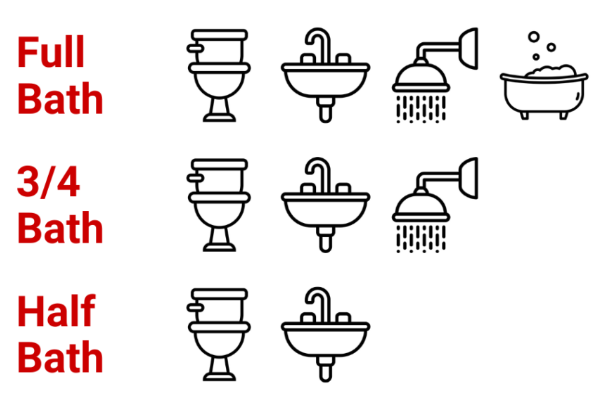 

## Preparação dos Dados - Data Preparation

In [3]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install zipcodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 KB 18.6 MB/s eta 0:00:00


In [5]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install pycep-correios

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 5.5 MB/s eta 0:00:00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipcodes
import numpy as np

In [8]:
from pprint import pprint
from scipy import stats
import sidetable
import geopy
from geopy.geocoders import Nominatim

### Funções criadas

In [87]:
# Criando  o localizador baseado em lat e long
def geolocalizator(lat,longitude):
  geolocator = Nominatim(user_agent="localizador de Cidade e Bairro")
  location = geolocator.reverse(str(lat)+','+str(longitude))
  dicioBairros = (location.raw['address'])
  neighbourhood = dicioBairros.get('neighbourhood')
  city = dicioBairros.get('city')
  return neighbourhood, city



# Criando função para pegar a cidade com base no zipcode
def cep(a):
  city = zipcodes.matching(str(a))[0]
  return city['city']



# Função para criação do ranking - Critério: Maior melhor 
def rankC(a,aa,b,bb):
  l1=[]  
  for v in a[aa].values():
    for v2 in b[bb].values():
      if v > v2:
        l1.append(2)
      elif v == v2:
        l1.append(1)
      elif v < v2:
        l1.append(0)
  return l1



# Função para criação do ranking - Critério: Menor melhor 
def rankB(a,aa,b,bb):
  l2=[]  
  for v in a[aa].values():
    for v2 in b[bb].values():
      if v < v2:
        l2.append(2)
      elif v == v2:
        l2.append(1)
      elif v > v2:
        l2.append(0)
  return l2
      

### Dataset - Tratamento dos dados

In [10]:
# Lendo DS e entendendo
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Formação de Dados - Aluno/Mini Projeto/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
mu1 = df.memory_usage().sum()
mu1

3631112

In [12]:
# Transformando colunas objetos em categórica para aumentar eficiência (redução de memória utilizada)
categorical_columns_C = df.columns[df.dtypes==object].tolist() + ['lat','long','yr_renovated','yr_built','zipcode','grade','condition','view','waterfront']
df[categorical_columns_C] = df[categorical_columns_C].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21613 non-null  int64   
 1   date           21613 non-null  category
 2   price          21613 non-null  float64 
 3   bedrooms       21613 non-null  int64   
 4   bathrooms      21613 non-null  float64 
 5   sqft_living    21613 non-null  int64   
 6   sqft_lot       21613 non-null  int64   
 7   floors         21613 non-null  float64 
 8   waterfront     21613 non-null  category
 9   view           21613 non-null  category
 10  condition      21613 non-null  category
 11  grade          21613 non-null  category
 12  sqft_above     21613 non-null  int64   
 13  sqft_basement  21613 non-null  int64   
 14  yr_built       21613 non-null  category
 15  yr_renovated   21613 non-null  category
 16  zipcode        21613 non-null  category
 17  lat            21613 non-null  

In [13]:
# Renomeando as colunas
df_renamed = df.rename(columns={'date':'DATA',
                        'price':'PREÇO',
                        'bedrooms':'QUARTOS',
                        'bathrooms':'BANHEIROS',
                        'sqft_living':'ÁREA HABITÁVEL',
                        'sqft_lot':'ÁREA DO TERRENO',
                        'floors':'ANDARES',
                        'waterfront':'BEIRA MAR',
                        'view':'VISTA',
                        'condition':'CONDIÇÃO DO IMÓVEL',
                        'grade':'QUALIDADE DO MATERIAL DE CONSTRUÇÃO',
                        'sqft_above':'ÁREA ACIMA DO SOLO',
                        'sqft_basement':'SOTÃO',
                        'yr_built':'ANO DE CONSTRUÇÃO',
                        'yr_renovated':'ANO DE REFORMA',
                        'zipcode':'CEP',
                        'lat':'LATITUDE',
                        'long':'LONGITUDE',
                        'sqft_living15':'MÉDIA ÁREA HABITÁVEL 15 +PRÓXIMOS',
                        'sqft_lot15':'MÉDIA ÁREA LOTES 15 +PRÓXIMOS'                       
                        })
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   21613 non-null  int64   
 1   DATA                                 21613 non-null  category
 2   PREÇO                                21613 non-null  float64 
 3   QUARTOS                              21613 non-null  int64   
 4   BANHEIROS                            21613 non-null  float64 
 5   ÁREA HABITÁVEL                       21613 non-null  int64   
 6   ÁREA DO TERRENO                      21613 non-null  int64   
 7   ANDARES                              21613 non-null  float64 
 8   BEIRA MAR                            21613 non-null  category
 9   VISTA                                21613 non-null  category
 10  CONDIÇÃO DO IMÓVEL                   21613 non-null  category
 11  QUALIDADE DO MA

In [14]:
df_renamed['DATA'] = pd.to_datetime(df_renamed['DATA'])
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   21613 non-null  int64   
 1   DATA                                 21613 non-null  category
 2   PREÇO                                21613 non-null  float64 
 3   QUARTOS                              21613 non-null  int64   
 4   BANHEIROS                            21613 non-null  float64 
 5   ÁREA HABITÁVEL                       21613 non-null  int64   
 6   ÁREA DO TERRENO                      21613 non-null  int64   
 7   ANDARES                              21613 non-null  float64 
 8   BEIRA MAR                            21613 non-null  category
 9   VISTA                                21613 non-null  category
 10  CONDIÇÃO DO IMÓVEL                   21613 non-null  category
 11  QUALIDADE DO MA

In [15]:
# Redução de memória utilizada
mu2 = df.memory_usage().sum()
1 - mu2/mu1

0.3388645131298621

In [16]:
df_renamed.describe()

,id,PREÇO,QUARTOS,BANHEIROS,ÁREA HABITÁVEL,ÁREA DO TERRENO,ANDARES,ÁREA ACIMA DO SOLO,SOTÃO,MÉDIA ÁREA HABITÁVEL 15 +PRÓXIMOS,MÉDIA ÁREA LOTES 15 +PRÓXIMOS
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,6210.000000,871200.000000


In [17]:
#### Tenho que verificar os BDs de criminalidade para entender os dados e posteriormente cruzar com a área das casas

# Criando DF de teste para a função de localização criada
local = pd.DataFrame ()
Latext = df_renamed['LATITUDE'][15:20]
Longtext = df_renamed['LONGITUDE'][15:20]
CepText = df_renamed['CEP'][15:20]
local['Lat'] = Latext
local['Long'] = Longtext
local['CEP'] = CepText


# Teste - Função geolocalizator
auxN = []
auxC = []

for i, row in local.iterrows():
  a,b = geolocalizator(str(row['Lat']),str(row['Long']))
  print(f"{row['Lat']} e {row['Long']}")
  auxN.append(a)
  auxC.append(b)
print(auxN)
print(auxC)
# Observado que não está pegando todas as cidades

# Teste - Função cep
auxC2 = []

for i in local['CEP']:
  c = cep(i)
  auxC2.append(cep(i))
print(auxC2)


47.5714 e -122.375
47.7277 e -121.962
47.6648 e -122.343
47.3089 e -122.21
47.3343 e -122.306
[None, None, None, None, None]
['Seattle', None, 'Seattle', None, None]
['Seattle', 'Duvall', 'Seattle', 'Auburn', 'Federal Way']


In [18]:
# Rodando o preenchimento das cidades no dataset com base no CEP
auxC2 = []
for i in df_renamed['CEP']:
  auxC2.append(cep(i))

# Incluindo no DS a coluna Cidade
df_renamed['CIDADE'] = auxC2

In [19]:
# Verificando vazios
df_renamed.isna().sum()
df_renamed.isna().sum().any()

False

In [20]:
# Criando coluna com tempo desde a última reforma ou construção
age = []
for i, v in df_renamed.iterrows():
  if v['ANO DE REFORMA'] == 0:
    age.append(2015-v['ANO DE CONSTRUÇÃO'])
  else:
    age.append(v['ANO DE REFORMA'] - v['ANO DE CONSTRUÇÃO'])

# TDI -> Refente ao tempo de de uso do imóvel desde a construção ou última reforma -> Quanto menor esse número, melhor (imóvel mais novo) 
df_renamed['TEMPO DO IMÓVEL'] = age

In [21]:
df_renamed['Relação A/T / A/H'] = df_renamed['ÁREA DO TERRENO'] / df_renamed['ÁREA HABITÁVEL']

In [22]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   21613 non-null  int64   
 1   DATA                                 21613 non-null  category
 2   PREÇO                                21613 non-null  float64 
 3   QUARTOS                              21613 non-null  int64   
 4   BANHEIROS                            21613 non-null  float64 
 5   ÁREA HABITÁVEL                       21613 non-null  int64   
 6   ÁREA DO TERRENO                      21613 non-null  int64   
 7   ANDARES                              21613 non-null  float64 
 8   BEIRA MAR                            21613 non-null  category
 9   VISTA                                21613 non-null  category
 10  CONDIÇÃO DO IMÓVEL                   21613 non-null  category
 11  QUALIDADE DO MA

### Estatística Exploratória 

In [23]:
# Tabela de frequência variáveis categóricas
df_renamed.stb.freq(['CIDADE','id'])

,CIDADE,id,count,percent,cumulative_count,cumulative_percent
0,Seattle,795000620,3,0.013881,3,0.013881
1,Woodinville,9238500040,2,0.009254,5,0.023134
2,Woodinville,7701960990,2,0.009254,7,0.032388
3,Woodinville,1630700361,2,0.009254,9,0.041642
4,Vashon,722039087,2,0.009254,11,0.050895
...,...,...,...,...,...,...
21431,Auburn,16000545,1,0.004627,21609,99.981493
21432,Auburn,16000435,1,0.004627,21610,99.986119
21433,Auburn,16000397,1,0.004627,21611,99.990746
21434,Auburn,16000200,1,0.004627,21612,99.995373


In [24]:
# Verificando duplicados
df_renamed.duplicated().any()

False

In [25]:
# Verificando casas revendidas
df_renamed['id'].duplicated().any()

True

In [26]:
df_renamed['CIDADE'] = df_renamed['CIDADE'].astype('category')
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   21613 non-null  int64   
 1   DATA                                 21613 non-null  category
 2   PREÇO                                21613 non-null  float64 
 3   QUARTOS                              21613 non-null  int64   
 4   BANHEIROS                            21613 non-null  float64 
 5   ÁREA HABITÁVEL                       21613 non-null  int64   
 6   ÁREA DO TERRENO                      21613 non-null  int64   
 7   ANDARES                              21613 non-null  float64 
 8   BEIRA MAR                            21613 non-null  category
 9   VISTA                                21613 non-null  category
 10  CONDIÇÃO DO IMÓVEL                   21613 non-null  category
 11  QUALIDADE DO MA

In [28]:
And = df_renamed['ANDARES'].value_counts(normalize=True)
Qua = df_renamed['QUARTOS'].value_counts(normalize=False)
Ban = df_renamed['BANHEIROS'].value_counts(normalize=False)
# Excluindo outlier para não interferir na análise
df_renamed.drop(index=15870,inplace=True)

In [29]:
# Filtrando para verificar se outlier permanece
df_renamed[df_renamed['QUARTOS']==33]

,id,DATA,PREÇO,QUARTOS,BANHEIROS,ÁREA HABITÁVEL,ÁREA DO TERRENO,ANDARES,BEIRA MAR,VISTA,...,ANO DE CONSTRUÇÃO,ANO DE REFORMA,CEP,LATITUDE,LONGITUDE,MÉDIA ÁREA HABITÁVEL 15 +PRÓXIMOS,MÉDIA ÁREA LOTES 15 +PRÓXIMOS,CIDADE,TEMPO DO IMÓVEL,Relação A/T / A/H


In [102]:
# Agrupando por cidade
df_renamedGroup = df_renamed.groupby('CIDADE').mean().reset_index()

In [99]:
# Excuindo colunas desnecessárias
df_renamedGroup = df_renamedGroup.drop(['MÉDIA ÁREA HABITÁVEL 15 +PRÓXIMOS' ,'MÉDIA ÁREA LOTES 15 +PRÓXIMOS'],axis=1,inplace=True)

In [31]:
# Criando a contagem de id repetido (revenda)
DS=(
   df_renamed[['CIDADE','id']].value_counts(normalize=False).to_frame('Count_id')
    .rename_axis(['city','id']).reset_index()
)

In [78]:
# Criando parâmetro preço por área do terreno e área habitável
df_renamed['PM - ÁREA TOTAL'] = df_renamed['PREÇO'] / df_renamed['ÁREA DO TERRENO']
df_renamed['PM - ÁREA CONSTRUÍDA'] = df_renamed['PREÇO'] / df_renamed['ÁREA HABITÁVEL']

# Casa reformada - Menor tempo de construção (menos que a média)
# Casa moderna - Menor tempo de construção / Maior qualidade do material (maior que a média)
# Casa com melhor condição para pessoas de maior idade - Menos andares (menor que a média) / Menor tempo de construção / Maior qualidade do material
# Baixo custo (custo acessível) - Menor preço / área
# Privacidade - Maior área do terreno / Maior área habitável
# Ambiente espaçoso (Guardar muitos itens) - Maior área do terreno / Maior área habitável
cidade = df_renamed['CIDADE'].unique()
med_at = df_renamed['ÁREA DO TERRENO'].agg('mean') # Critério: Maior melhor - Área do Terreno
med_ah = df_renamed['ÁREA HABITÁVEL'].agg('mean') # Critério: Maior melhor - Área Habitável
med_andares = df_renamed['ANDARES'].agg('mean') # Critério: Menor melhor - Andares
med_tdi = df_renamed['TEMPO DO IMÓVEL'].agg('mean')# Critério: Menor melhor - Tempo do imóvel
med_p_at = df_renamed['PM - ÁREA TOTAL'].agg('mean') # Critério: Menor melhor - preço / área
med_p_ah = df_renamed['PM - ÁREA CONSTRUÍDA'].agg('mean') # Critério: Menor melhor - preço / área

med_qmc = df_renamed['QUALIDADE DO MATERIAL DE CONSTRUÇÃO'].value_counts().to_frame('Qualidade_Material').rename_axis(['Qualidade']).reset_index() # Critério: Maior melhor - qualidade material
med_cdi = df_renamed['CONDIÇÃO DO IMÓVEL'].value_counts().value_counts().to_frame('Condição_Imóvel').rename_axis(['CondiçãoIM']).reset_index() # Critério: Maior melhor - condição do imóvel
df_renamed.stb.freq(['CIDADE','QUALIDADE DO MATERIAL DE CONSTRUÇÃO'])
v1 = df_renamed.stb.freq(['CIDADE','CONDIÇÃO DO IMÓVEL'])



In [96]:
# Verificando qual como é a distribuição da relação área terreno com área habitável entre os imóveis do DS
df_renamed['AT / AH round'] = df_renamed['Relação A/T / A/H'].round(0) 
df_renamed['AT / AH round'].describe(percentiles=[0.5,0.9,0.95,0.99])
# Menor melhor -> Maior parte dos imóveis aproveita mais os espaços do terreno

count    21612.000000
mean         7.463863
std         22.966272
min          0.000000
50%          4.000000
90%         11.000000
95%         19.000000
99%         81.000000
max       1641.000000
Name: AT / AH round, dtype: float64

In [106]:
#Criando listas com as pontuações obtidas com base nos parâmetros estabelecidos em pesquisas e observações de preferências dos americanos
at = [] # Ma
ah = [] # Ma
andares = [] # Me
tdi = [] # Me
p_at = [] # Me
p_ah = [] # Me
at_ah = [] # Me

for i,v in df_renamed.iterrows():
  for i2,v2 in df_renamedGroup.iterrows():
    if v['CIDADE'] == v2['CIDADE']:
      if v['ÁREA DO TERRENO'] >= v2['ÁREA DO TERRENO']: #5
        at.append(1)
      else:
        at.append(0)
      if v['ÁREA HABITÁVEL'] >= v2['ÁREA HABITÁVEL']: #4
        ah.append(1)
      else:
        ah.append(0)
      if v['ANDARES'] <= v2['ANDARES']: #7
        andares.append(1)
      else:
        andares.append(0)
      if v['TEMPO DO IMÓVEL'] <= v2["TEMPO DO IMÓVEL"]: #6
        tdi.append(1)
      else:
        tdi.append(0)
      if v['PM - ÁREA TOTAL'] <= v2['PM - ÁREA TOTAL']: #2
        p_at.append(1)
      else:
        p_at.append(0)
      if v['PM - ÁREA CONSTRUÍDA'] <= v2['PM - ÁREA CONSTRUÍDA']: #1
        p_ah.append(1)
      else:
        p_ah.append(0)
      if v['AT / AH round'] <= v2['AT / AH round']: #3
        at_ah.append(1)
      else:
        at_ah.append(0)


In [ ]:
# Criação do ranking e Somatório de pontos
df_ranking = df_renamed[['id','CIDADE','VISTA','BEIRA MAR','BANHEIROS','QUARTOS','PREÇO']]
df_ranking['P1 - PREÇO / AREA HABITAVEL'] = p_ah
df_ranking['P2 - PREÇO / AREA TOTAL']= p_at
df_ranking['P3 - RELAÇÃO AREA TERRENO / AREA HABITAVEL']= at_ah
df_ranking['P4 - AREA HABITAVEL']= ah
df_ranking['P5 - AREA TERRENO']= at
df_ranking['P6 - TEMPO IMOVEL']= tdi
df_ranking['P7 - ANDARES']= andares

In [ ]:
# Nota final baseado nos critérios definidos
df_ranking['ranking'] = (
                         df_ranking['P1 - PREÇO / AREA HABITAVEL'] + 
                         df_ranking['P2 - PREÇO / AREA TOTAL'] + 
                         df_ranking['P3 - RELAÇÃO AREA TERRENO / AREA HABITAVEL'] + 
                         df_ranking['P4 - AREA HABITAVEL'] +
                         df_ranking['P5 - AREA TERRENO'] +
                         df_ranking['P6 - TEMPO IMOVEL'] +
                         df_ranking['P7 - ANDARES']
)

In [211]:
# Não comprar - Advertências
adv = df_ranking[(df_ranking['ranking']<=0)]
adv
# adv2 = df_ranking[(df_ranking['ranking']<=1) & (df_ranking['PREÇO']>1380000)]
# adv2

,id,CIDADE,VISTA,BEIRA MAR,BANHEIROS,QUARTOS,PREÇO,P1 - PREÇO / AREA HABITAVEL,P2 - PREÇO / AREA TOTAL,P3 - RELAÇÃO AREA TERRENO / AREA HABITAVEL,P4 - AREA HABITAVEL,P5 - AREA TERRENO,P6 - TEMPO IMOVEL,P7 - ANDARES,ranking
10584,191100140,Mercer Island,0,0,2.5,4,1060000.0,0,0,0,0,0,0,0,0


In [197]:
# Indicações de compra
rankind = df_ranking[(df_ranking['ranking']==7) & (df_ranking['PREÇO']<230000)]
rankind

,id,CIDADE,VISTA,BEIRA MAR,BANHEIROS,QUARTOS,PREÇO,P1 - PREÇO / AREA HABITAVEL,P2 - PREÇO / AREA TOTAL,P3 - RELAÇÃO AREA TERRENO / AREA HABITAVEL,P4 - AREA HABITAVEL,P5 - AREA TERRENO,P6 - TEMPO IMOVEL,P7 - ANDARES,ranking
3083,5476200123,Seattle,0,0,2.00,4,200000.0,1,1,1,1,1,1,1,7
3540,1823049202,Seattle,0,0,1.50,6,175000.0,1,1,1,1,1,1,1,7
5183,2328800130,Seattle,0,0,1.75,3,220000.0,1,1,1,1,1,1,1,7
12185,7686202065,Seattle,0,0,1.75,4,170000.0,1,1,1,1,1,1,1,7
19380,5537200043,Seattle,0,0,1.00,4,211000.0,1,1,1,1,1,1,1,7


In [166]:
fig = px.scatter(df_ranking,x='ranking',y='PREÇO',color='CIDADE')
fig.show()

### Conclusão

Critérios Avaliados e porque:

OBS: Todos os critérios foram relativizados com os valores médios por cidade. Entendo que desse modo a análise tende a ser mais realista por reduzir a margem de erro e melhor de se observar uma oportunidade num ambiente mais semelhante. Em resumo, comparar banana com banana, não banana com maça.

Pontuação: Para cada item satisfeito, o imóvel recebeu 1 ponto, podendo totalizar 7.

1. Preço por área habitável (ft²) do imóvel comparada com média da cidade. Quanto mais baixo o preço da área habitável, menor é o custo unitário e melhor o investimento
2. Preço por área do terreno (ft²) do imóvel comparada com a média da cidade. Quanto mais baixo o preço da área total, menor é o custo unitário e melhor o investimento
3. Relação de utilização do terreno disponível. Área do terreno por área habitável. Quanto menor esse valor, maior foi a utlização do terreno disponível na construção. Esse indicador foi importante pois em pesquisas foi apontado que americanos costumam acumular muita coisa e necessitam de área construída para guardar
4. Área habitável ou área construída em relação à média da cidade. Quanto maior a área construída melhor.
5. Área total em relação à média da cidade. Quanto maior a área total do terreno melhor.
6. Tempo desde a construção ou última reforma em relação à média da cidade. Em pesquisas, identifiquei que americanos gostam de adquirir imóveis finalizados e prontos para morar. De tal modo, se o imóvel está com tempo de construção ou de reforma recente, tende a ter mais conforme e menos problemas a serem consertados
7. Andares. Quanto menor o número de andares melhor. Em pesquisas identifiquei que é muito valorizado a adequação do imóvel para idosos, visto que a população americana está envelhecendo mais. Desse modo, quanto menos escadas no imóvel, melhor pois evita o risco de acidentes com os idosos e facilita a locomoção.

O somatório de todas essas premissas foi o que definiu os imóveis escolhidos para indicação e as advertências.

O fator de desempate quanto aos imóveis que atingiram pontuação máxima ou mínima foi o preço final. Quanto mais baixo o preço do imóvel e pontuação máxima nas premissas definidas, melhor o negócio. E quanto maior o preço e pontuação mais baixa, pior o negócio.

Indicados: DF -> rankind

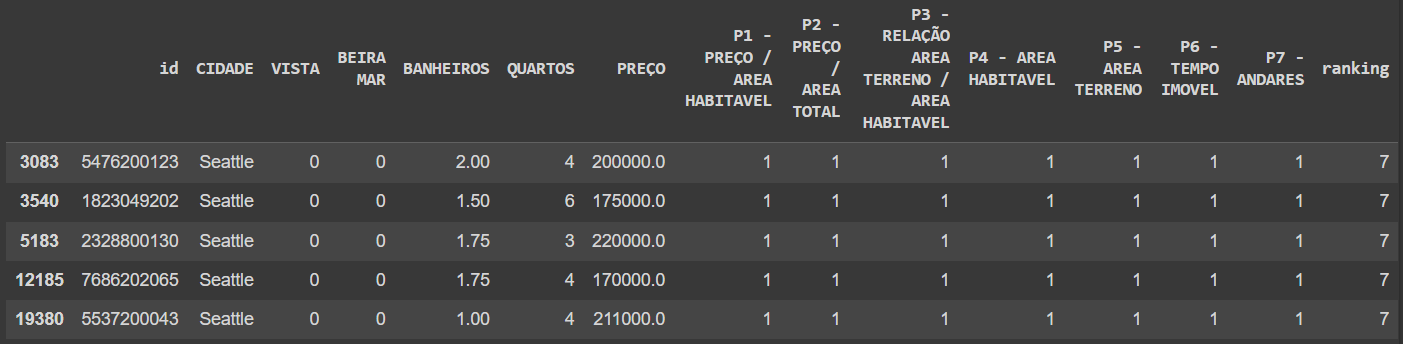

Advertências: DF -> adv e adv2



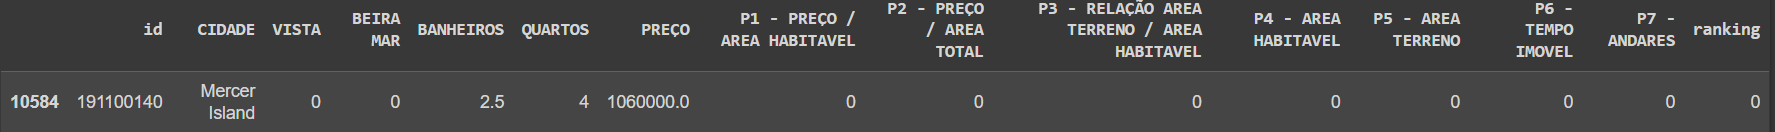

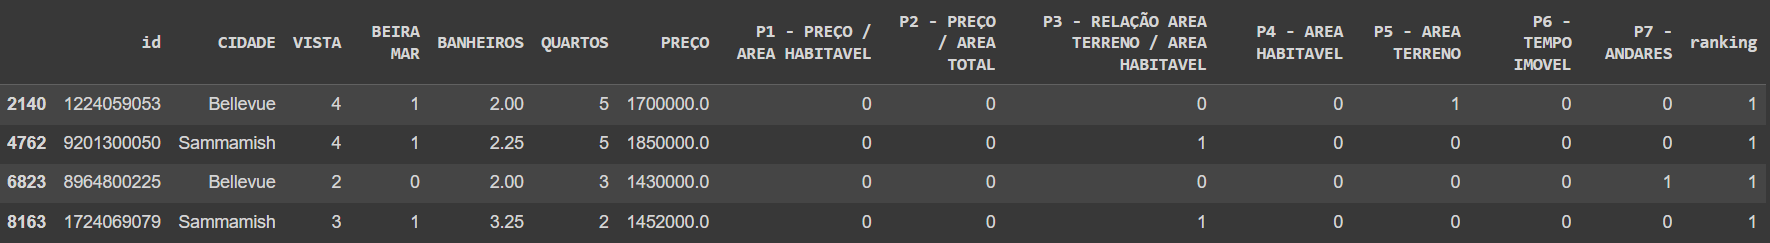